In [1]:
from plato.environment import Environment

In [2]:
config = {
  "whites":{
    "params":{
    "n_white_infantry":10,
    "n_white_vehicle":4,
    "n_white_drone":2},
    "init":"NW"
  },

  "blacks":{
    "params":{
    "n_black_infantry":5,
    "n_black_vehicle":3,
    "n_black_drone":1},
    "init":"SE"
  }
}

In [3]:
sim = Environment(config, shape=(64,64))

In [4]:
obs = sim.reset()

In [5]:
for id_,w in sim.whites.items(): print('{:13}'.format(id_), w)

BRAVO         <plato.entity.infantry.Infantry object at 0x117d58150>
MAHAN         <plato.entity.infantry.Infantry object at 0x118538e90>
TYPHOON       <plato.entity.infantry.Infantry object at 0x118544910>
ROMEO         <plato.entity.infantry.Infantry object at 0x118546410>
HIGGINS       <plato.entity.infantry.Infantry object at 0x118546ed0>
YANKEE        <plato.entity.infantry.Infantry object at 0x1185459d0>
MONSOON       <plato.entity.infantry.Infantry object at 0x11854b4d0>
GIFFORDS      <plato.entity.infantry.Infantry object at 0x11854bf90>
QUEBEC        <plato.entity.infantry.Infantry object at 0x11854da90>
LONDON        <plato.entity.infantry.Infantry object at 0x11854e590>
WICHITA       <plato.entity.vehicle.Vehicle object at 0x118552b50>
ZERO          <plato.entity.vehicle.Vehicle object at 0x118555750>
TEMPEST       <plato.entity.vehicle.Vehicle object at 0x118552090>
COLORADO      <plato.entity.vehicle.Vehicle object at 0x117d58550>
ECHO          <plato.entity.drone.Drone ob

In [6]:
for id_,w in sim.blacks.items(): print('{:13}'.format(id_), w)

unknown_0     <plato.entity.infantry.Infantry object at 0x11855b890>
unknown_1     <plato.entity.infantry.Infantry object at 0x11855b9d0>
unknown_2     <plato.entity.infantry.Infantry object at 0x1185414d0>
unknown_3     <plato.entity.infantry.Infantry object at 0x11855ca90>
unknown_4     <plato.entity.infantry.Infantry object at 0x11855d5d0>
unknown_5     <plato.entity.vehicle.Vehicle object at 0x118541f90>
unknown_6     <plato.entity.vehicle.Vehicle object at 0x11855cad0>
unknown_7     <plato.entity.vehicle.Vehicle object at 0x11855d610>
unknown_8     <plato.entity.drone.Drone object at 0x117d585d0>


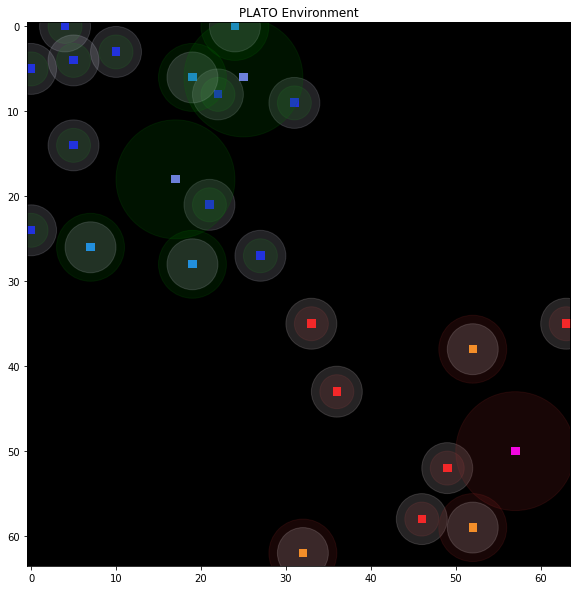

In [7]:
canvas = sim.render()

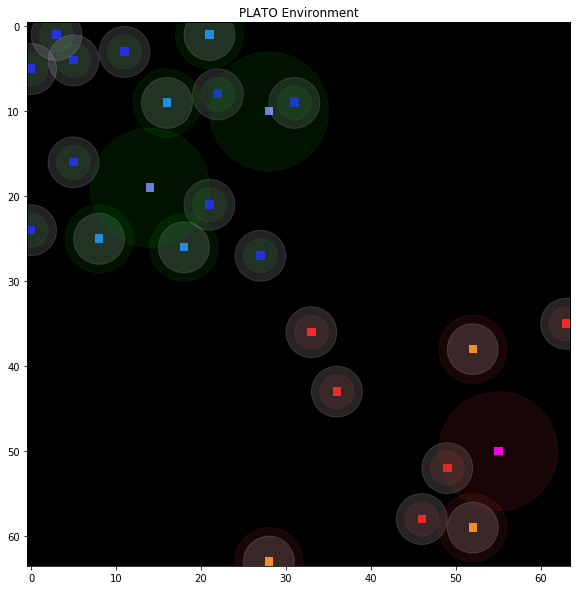

In [8]:
terminal = False
while not terminal:
    whites = {id:ent.random_action() for id,ent in sim.whites.items() if ent.operational}
    blacks = {id:ent.random_action() for id,ent in sim.blacks.items() if ent.operational}
    
    sprime, reward, terminal, metdata = sim.step(whites, blacks)
    state = sprime
        
    sim.render()
    break

In [9]:
minimap = sim.observation(sim.whites, negative=None)
minimap.shape

(25, 64, 64)

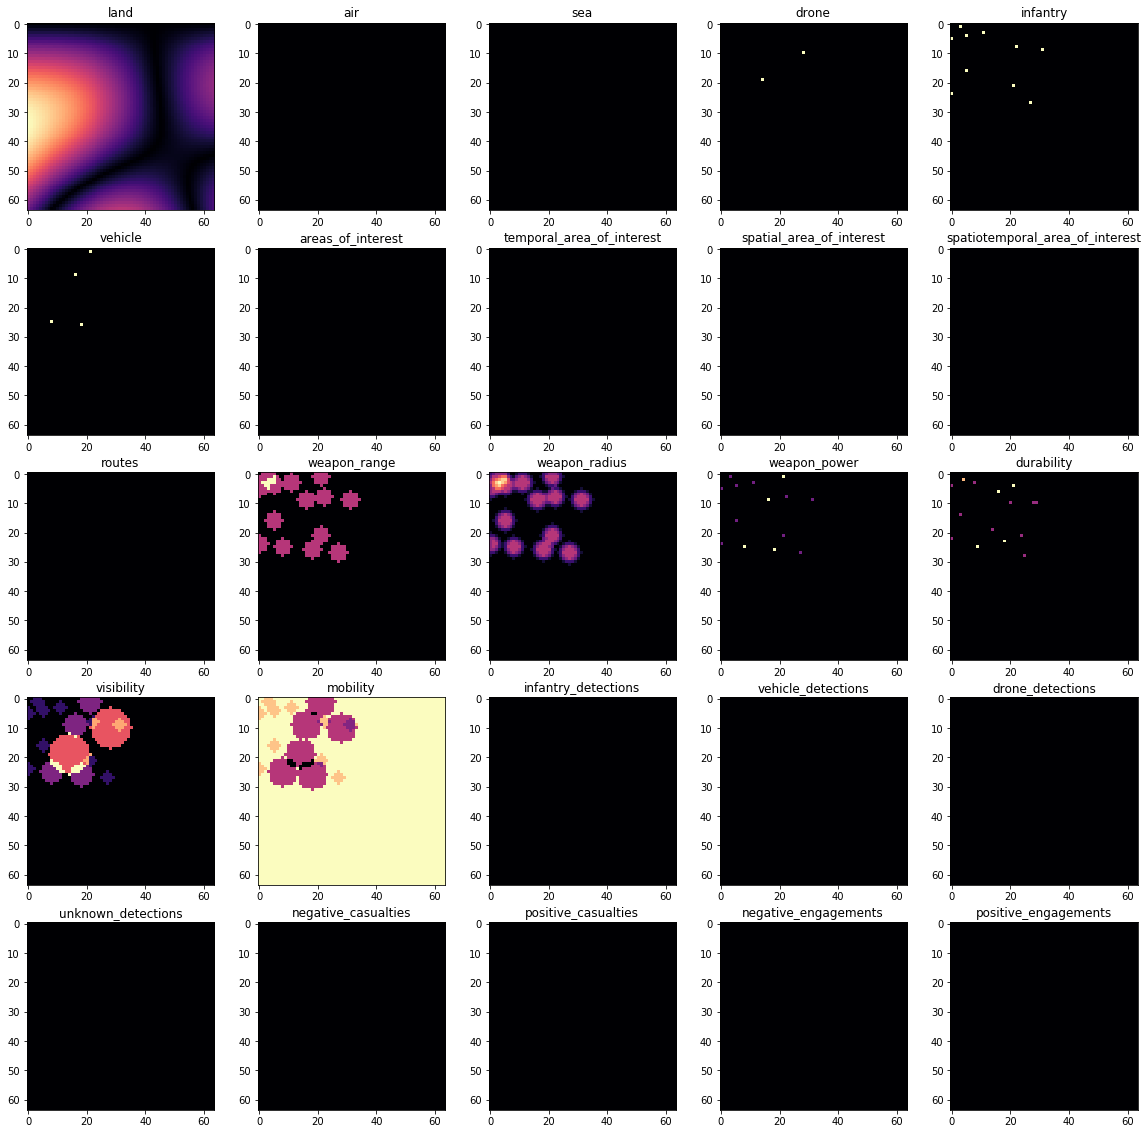

In [10]:
import numpy as np, matplotlib.pyplot as mp
from plato.features import global_features
fig,ax = mp.subplots(5,5, figsize=(20,20))
for itr,(name,feat) in enumerate(zip(global_features, minimap)):
    i,j = np.unravel_index(itr,(5,5))
    ax[i,j].set_title(name)
    ax[i,j].imshow(feat, cmap='magma')
mp.show()